# LInear Reg Practice-Vehicle dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df=pd.read_csv("Car details v3.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
#better with random Forest regressor but for learning using linear regression

# EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [42]:
#Let us predict using year,km_driven,seats,transmission,fuel,engine,mileage predicting the selling price

In [43]:
df["mileage"]=df["mileage"].str.replace("kmpl","")
df["mileage"]=df["mileage"].str.replace("km/kg","")

In [44]:
df["engine"]=df["engine"].str.replace("CC","")

In [45]:
a={"Petrol":0,"Diesel":1,"CNG":2,"LPG":3}
df["fuel"]=df["fuel"].map(a)

In [46]:
b={"Manual":0,"Automatic":1}
df["transmission"]=df["transmission"].map(b)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,Individual,0,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,Individual,0,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,Individual,0,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,Individual,0,First Owner,23.0,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,Individual,0,First Owner,16.1,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,0,Individual,0,First Owner,18.5,1197,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,Individual,0,Fourth & Above Owner,16.8,1493,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,Individual,0,First Owner,19.3,1248,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,Individual,0,First Owner,23.57,1396,70 bhp,140Nm@ 1800-3000rpm,5.0


In [47]:
data=df[["year","km_driven","seats","mileage","engine","fuel","transmission","selling_price"]]

In [48]:
data

,year,km_driven,seats,mileage,engine,fuel,transmission,selling_price
0,2014,145500,5.0,23.4,1248,1,0,450000
1,2014,120000,5.0,21.14,1498,1,0,370000
2,2006,140000,5.0,17.7,1497,0,0,158000
3,2010,127000,5.0,23.0,1396,1,0,225000
4,2007,120000,5.0,16.1,1298,0,0,130000
...,...,...,...,...,...,...,...,...
8123,2013,110000,5.0,18.5,1197,0,0,320000
8124,2007,119000,5.0,16.8,1493,1,0,135000
8125,2009,120000,5.0,19.3,1248,1,0,382000
8126,2013,25000,5.0,23.57,1396,1,0,290000


In [49]:
data.dtypes

year               int64
km_driven          int64
seats            float64
mileage           object
engine            object
fuel               int64
transmission       int64
selling_price      int64
dtype: object

In [50]:
data["mileage"]=data["mileage"].astype("float")
data["engine"]=data["engine"].astype("float")

C:\Users\KEERTHAN\AppData\Local\Temp\ipykernel_1520\2819580909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mileage"]=data["mileage"].astype("float")
C:\Users\KEERTHAN\AppData\Local\Temp\ipykernel_1520\2819580909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["engine"]=data["engine"].astype("float")


In [51]:
data.rename(columns={"mileage":"mileage(kmpl)","engine":"engine(CC)"},inplace=True)

C:\Users\KEERTHAN\AppData\Local\Temp\ipykernel_1520\1181864170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"mileage":"mileage(kmpl)","engine":"engine(CC)"},inplace=True)


In [52]:
data

,year,km_driven,seats,mileage(kmpl),engine(CC),fuel,transmission,selling_price
0,2014,145500,5.0,23.40,1248.0,1,0,450000
1,2014,120000,5.0,21.14,1498.0,1,0,370000
2,2006,140000,5.0,17.70,1497.0,0,0,158000
3,2010,127000,5.0,23.00,1396.0,1,0,225000
4,2007,120000,5.0,16.10,1298.0,0,0,130000
...,...,...,...,...,...,...,...,...
8123,2013,110000,5.0,18.50,1197.0,0,0,320000
8124,2007,119000,5.0,16.80,1493.0,1,0,135000
8125,2009,120000,5.0,19.30,1248.0,1,0,382000
8126,2013,25000,5.0,23.57,1396.0,1,0,290000


In [60]:
data.dropna(inplace=True)

C:\Users\KEERTHAN\AppData\Local\Temp\ipykernel_1520\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [61]:
data.dtypes

year               int64
km_driven          int64
seats            float64
mileage(kmpl)    float64
engine(CC)       float64
fuel               int64
transmission       int64
selling_price      int64
dtype: object

In [62]:
data.corr()

,year,km_driven,seats,mileage(kmpl),engine(CC),fuel,transmission,selling_price
year,1.000000,-0.428434,-0.009144,0.329145,0.018848,0.020245,0.248972,0.412268
km_driven,-0.428434,1.000000,0.227336,-0.173073,0.205914,0.260587,-0.201207,-0.222196
seats,-0.009144,0.227336,1.000000,-0.452085,0.610309,0.309251,-0.072821,0.041358
mileage(kmpl),0.329145,-0.173073,-0.452085,1.000000,-0.575831,0.080811,-0.178830,-0.126054
engine(CC),0.018848,0.205914,0.610309,-0.575831,1.000000,0.433584,0.283237,0.455734
fuel,0.020245,0.260587,0.309251,0.080811,0.433584,1.000000,-0.043276,0.167373
transmission,0.248972,-0.201207,-0.072821,-0.178830,0.283237,-0.043276,1.000000,0.590279
selling_price,0.412268,-0.222196,0.041358,-0.126054,0.455734,0.167373,0.590279,1.000000


<Axes: >

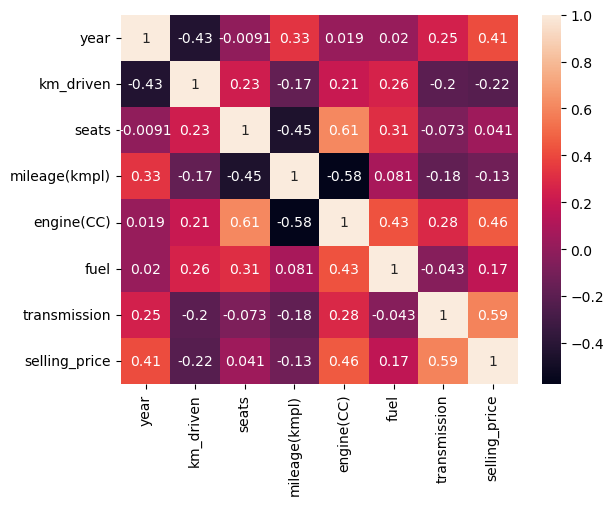

In [63]:
sns.heatmap(data.corr(),annot=True)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
X=data[["year","km_driven","seats","mileage(kmpl)","engine(CC)","fuel","transmission"]]
Y=data["selling_price"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [83]:
msc=cross_val_score(lin_reg,X_train,Y_train,scoring="neg_mean_squared_error",cv=100)

In [84]:
msc

array([-5.67182725e+11, -1.48635585e+11, -2.02705952e+11, -7.10939431e+10,
       -4.05152628e+11, -1.27225179e+11, -4.44102717e+11, -8.10019546e+10,
       -9.59209021e+10, -5.41692032e+11, -5.13344272e+11, -3.19715966e+11,
       -8.47150197e+10, -1.33143991e+11, -2.63302825e+11, -2.27187639e+11,
       -3.67205767e+11, -8.99183104e+10, -3.25162055e+11, -9.52952049e+10,
       -2.14555715e+11, -4.33311968e+11, -2.90296856e+11, -2.70192041e+11,
       -4.00193184e+11, -1.28753490e+12, -2.51419006e+11, -1.35436507e+11,
       -2.76021355e+11, -1.47615193e+11, -1.49514605e+11, -4.08928010e+11,
       -3.00030428e+11, -4.31602433e+11, -1.26559383e+11, -2.60657139e+11,
       -5.57237020e+11, -4.76580881e+11, -3.58584097e+11, -1.89948322e+11,
       -3.17833301e+11, -1.89017623e+11, -2.38532006e+11, -1.22803071e+11,
       -6.10687181e+11, -5.25171933e+11, -2.14209169e+11, -2.77881530e+11,
       -9.21969199e+10, -4.85824191e+11, -4.62299245e+11, -3.39101097e+11,
       -1.96372026e+11, -

In [85]:
mean_msc=np.mean(msc)
mean_msc

-299124988686.5007

In [86]:
lin_reg.score(X_test,Y_test)

0.5676905958495111

In [92]:
#for predicting the price we will use year,km_driven,seats,mileage(kmpl),engine(CC),fuel,transmission
print("Enter the details")
a = {}
for i in ["year", "km_driven", "seats", "mileage(kmpl)", "engine(CC)", "fuel", "transmission"]:
    a[i] = float(input(f"Enter {i}: "))  # Take user input for each feature

car_data = pd.DataFrame(a, index=[0])  # Convert user input to a DataFrame

# Assuming lin_reg is your trained Linear Regression model
predicted_price = lin_reg.predict(car_data)

print(f"The predicted price for the car is: {predicted_price[0]}")


Enter the details
Enter year: 2014
Enter km_driven: 140000
Enter seats: 5
Enter mileage(kmpl): 25
Enter engine(CC): 1245
Enter fuel: 1
Enter transmission: 0
The predicted price for the car is: 417678.81633396447


# Ridge

In [100]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-1000,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5,
                                   10, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [101]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.0}
-303346823014.8873


In [97]:
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, Y_train, Y_test are your training and testing data
ridge = Ridge(alpha=1e-15)  # You can adjust the alpha (regularization strength) as needed
#just used the best fit alpha
ridge.fit(X_train, Y_train)  # Fitting the Ridge Regression model

# Predicting on test set
predictions = ridge.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 282407630879.25256


# Lasso

In [102]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
Lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
Lasso_regressor=GridSearchCV(Lasso,params,scoring='neg_mean_squared_error',cv=5)
Lasso_regressor.fit(X_train,Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.445e+14, tolerance: 2.964e+11
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.964e+14, tolerance: 2.722e+11
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.170e+14, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [103]:
print(Lasso_regressor.best_params_)
print(Lasso_regressor.best_score_)

{'alpha': 40}
-303346065686.0686


Lasso(alpha=40)